# Electricity time series data from Tepco

In [98]:
%pylab inline
import pandas as pd
import seaborn as sns
from io import StringIO
import requests
import json
import plotly.express as px
import ipywidgets as widgets
from datetime import datetime
import pytz
import matplotlib.dates as mdates


Populating the interactive namespace from numpy and matplotlib


/Users/annette/.local/share/virtualenvs/covid-8MZFs_Ml/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning:

pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy



# sources

General time series tutorial
https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

Kaggle forcasting
https://www.kaggle.com/apoorvabhide/energy-consumption-time-series-forecasting-in-r

In [99]:
df19 = pd.read_csv("data/juyo-2019.csv")
df20 = pd.read_csv("data/juyo-2020.csv")
df19["daytime"] = pd.to_datetime(df19["DATE"]+" "+df19["TIME"], format="%Y/%m/%d %H:%M")
df20["daytime"] = pd.to_datetime(df20["DATE"]+" "+df20["TIME"], format="%Y/%m/%d %H:%M")
df20["実績(万kW)"]

df20 = df20.set_index('daytime')
df19 = df19.set_index('daytime')

df = pd.concat([df19, df20], sort=True)

# "実績(万kW)" = demand in 10MW
df = df.rename(columns={"実績(万kW)": "demand", "TIME": 'time', "DATE": "date"}, errors="raise")
# bring demand to MW (not 10MW)
df["demand"]=df["demand"]*10


In [100]:
df

,date,time,demand
daytime,,,
2019-01-01 00:00:00,2019/1/1,0:00,30170
2019-01-01 01:00:00,2019/1/1,1:00,28490
2019-01-01 02:00:00,2019/1/1,2:00,27300
2019-01-01 03:00:00,2019/1/1,3:00,26360
2019-01-01 04:00:00,2019/1/1,4:00,25790
...,...,...,...
2020-04-02 19:00:00,2020/4/2,19:00,35530
2020-04-02 20:00:00,2020/4/2,20:00,34560
2020-04-02 21:00:00,2020/4/2,21:00,33410


In [101]:
df['month'] = df.index.month
df['weekday'] = df.index.weekday
df['year']= df.index.year
#sns.lineplot(x=df, y="demand", ci=95, data=df)

In [118]:
sns.set(rc={'figure.figsize':(11, 4)})
df.head()
daily = df.loc['2019-01-01':'2020-03-31'].resample('W').sum()
df.loc['2019-03-01':'2020-04-02', 'demand']
df19=df.loc['2019-03-01': '2019-04-02', 'demand']
df20=df.loc['2020-03-01': '2020-04-02', 'demand']
daily.tail()
daily.resample('D').sum()

,demand,month,weekday,year
daytime,,,,
2019-01-06,4404120,144,504,290736
2019-01-07,0,0,0,0
2019-01-08,0,0,0,0
2019-01-09,0,0,0,0
2019-01-10,0,0,0,0
...,...,...,...,...
2020-04-01,0,0,0,0
2020-04-02,0,0,0,0
2020-04-03,0,0,0,0


In [119]:
df19.tail()

daytime
2019-04-02 19:00:00    39300
2019-04-02 20:00:00    38420
2019-04-02 21:00:00    37190
2019-04-02 22:00:00    35360
2019-04-02 23:00:00    32920
Name: demand, dtype: int64

In [120]:
weekly = df.loc['2019-01-01':'2020-03-31']

#daily = daily.loc['2019-01-01':'2019-03-31', 'demand']
weekly = weekly.resample('D').sum()
#daily.loc['2019-01-01':'2019-04-02', 'demand']
#df.loc['2019-03-01':'2020-04-02', 'demand']
weekly.tail()

,demand,month,weekday,year
daytime,,,,
2020-03-27,724280,72,96,48480
2020-03-28,653340,72,120,48480
2020-03-29,781570,72,144,48480
2020-03-30,833830,72,0,48480
2020-03-31,809080,72,24,48480


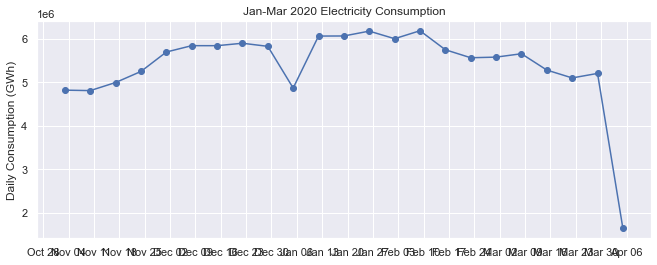

In [125]:
fig, ax = plt.subplots()
ax.plot(daily.loc['2019-11-01':'2020-04-30', 'demand'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Mar 2020 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));


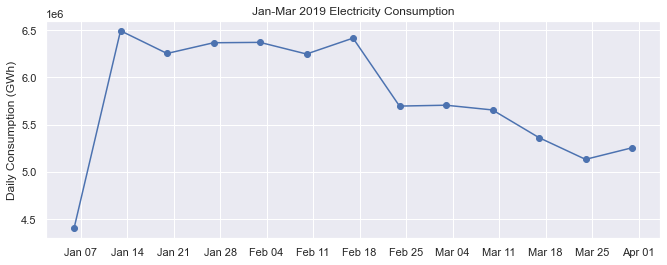

In [122]:
# ax = df.loc['2019', 'demand'].plot()
# ax.set_ylabel('Daily Consumption (MWh)');

fig, ax = plt.subplots()
ax.plot(daily.loc['2019-01-01':'2019-03-31', 'demand'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Mar 2019 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));


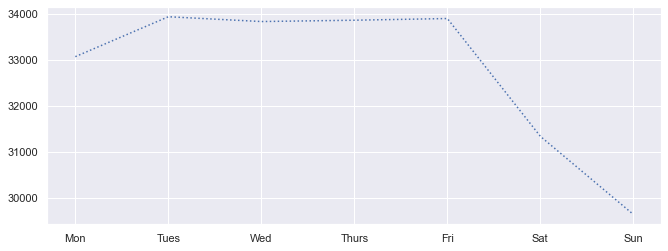

In [114]:
df19=df.loc['2019-03-01':'2019-03-30', 'demand']
df20=df.loc['2020-03-01':'2020-03-30', 'demand']
df20
by_weekday = df.groupby(df.index.dayofweek).mean()['demand']
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);


In [115]:
df19=daily.loc['2019-03-01':'2019-03-30', 'demand']
df20=daily.loc['2020-03-01':'2020-03-30', 'demand']